In [16]:
# 라이브러리 import
from langchain_openai import ChatOpenAI
import os

from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
os.environ["openai_api_key"] = 

In [3]:
llm = ChatOpenAI(
    temperature=0.1, ## 창의성 (0.0 ~ 2.0) : 낮을수록 더 집중되고 결정적인 답변
    # max_tokens=2048, ## 최대 토큰수
    model_name="gpt-4o-audio-preview" ## 모델명
)

(-0.5, 440.5, 745.5, -0.5)

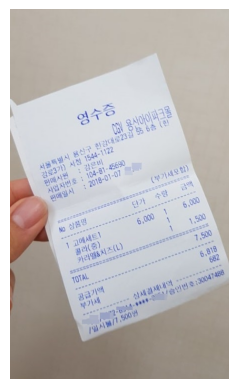

In [20]:
# Pillow
image1 = Image.open("파란영수증1.jpg")
image1_np = np.array(image1)
plt.imshow(image1_np)
plt.axis("off")

In [1]:
from PIL import Image
import pytesseract  # Tesseract OCR
from langchain.chat_models import ChatOpenAI  # LLM
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"  # Windows

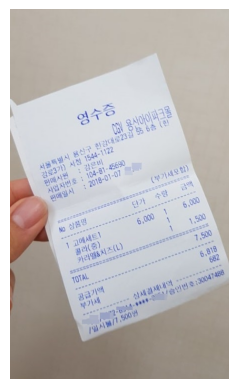

In [3]:
# 이미지 로드 및 시각화
image_path = "파란영수증1.jpg"
image = Image.open(image_path)
plt.imshow(image)
plt.axis("off")
plt.show()

In [8]:
! pip install -q easyocr

In [15]:
import easyocr
from PIL import Image

# 이미지를 직접 PIL 객체로 열기
image_path = "영수증 예시.jpg"
image = Image.open(image_path)

# EasyOCR Reader 생성 (한글과 영어 인식)
reader = easyocr.Reader(['ko', 'en'])

# PIL 이미지 객체를 EasyOCR에 전달
result = reader.readtext(image, detail=0)

# 결과 출력
print("EasyOCR Output:", result)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


EasyOCR Output: ['RECEIPT', 'COMPANY NAME', 'A어dross;', 'Lorem Ipsun', '8,24', 'Uele', 'NMnD YWYY', 'Mdnooer:', 'Lurtr', 'Ipiuii', 'Description', 'Price', 'Orange luice', '8215', 'Apples', '83,30', 'Tomata', '82 40', 'Fish', '36 9g', 'Bee', 'S10 UU', 'Onion', '51,25', 'Cheese', '83,40', 'Tax', 'TOTAL', '529.69', 'THANK You', '1234567789635', '8021']


In [16]:
# OCR을 사용하여 텍스트 추출
ocr_text = pytesseract.image_to_string(image, lang="kor+eng")
print("OCR Output:", ocr_text)

OCR Output: Address Lorem Ipsum 8/24
Date:

Manager Lorem Ipsum
Description Price
Orange Juice $2.15
Apples $3.50
Tomato $2.40
Fish 36.99
Beef $10.00
Onion $1.25
Cheese $3.40
Tax

TOTAL $29.69

THANK YOU

123456778963578021



In [ ]:
# LLM 호출
llm = ChatOpenAI(
    temperature=0.1, 
    model_name="gpt-4o"
)

# GPT-4에게 텍스트를 분석하도록 요청
prompt = f"""
From the following text extracted from a receipt, identify and extract:
- Store Name
- Address
- Date
- Payment Details (amount, method)

Receipt Text:
{ocr_text}
"""
response = llm.invoke([("human", {"type": "text", "text": prompt})])

# 결과 출력
print("Extracted Information:", response.content)

